In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
def read_data(input_file, index):
    input_data = np.loadtxt(input_file, delimiter = ',')
    
    #Lambda function to convert strings to Pandas date format
    to_date = lambda x, y: f'{str(int(x))}-{str(int(y))}'
    
    start = to_date(input_data[0, 0], input_data[0, 1])   #Extract the start date
    
    #Extract the end date
    if input_data[-1, 1] == 12:   #This is to make the end date to be exclusive
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1
        
    end = to_date(year, month)
    
    #Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq = 'M')
    
    #Add timestamps to the input data to create time series data
    output = pd.Series(input_data[:, index], index = date_indices)
    
    return output

In [4]:
input_file = 'data/data_2D.txt'

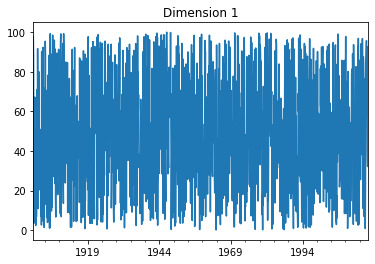

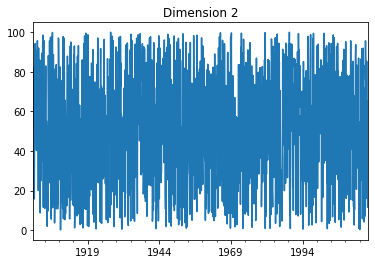

In [13]:
#Specify the columns that need to be converted into time series data
indices = [2, 3]

for index in indices:
    timeseries = read_data(input_file, index)
    
    #Plot the data
    plt.figure()
    plt.title(f'Dimension {index - 1}')
    timeseries.plot()